# Introduction:
    Home loan approval dependent on factors like credit score, loan amount,lifestyle, and assets. Lenders assess applicant backgrounds to   evaluate eligibility, considering past repayment records of similar profiles. Meeting criteria, including timely payments, enhances the chances of loan approval.


# Problem statement:
    Develop a machine learning model for automated home loan prediction using applicant details, optimizing eligibility assessment and predicting likely approval based on factors like Gender, Marital Status, Education, Dependents, Income, Loan Amount, and Credit History.


# Objectives:
    i)predicting if the loan can be given to that person on the basis of various parameters like income, marital status, gender, etc. 

    ii)The prediction model not only helps the applicant but also helps the bank by minimizing the risk and reducing the number of defaulters


# Data preprocessing:
    1) Loan_ID: A unique loan ID 
    2) Gender: Either male or female 
    3) Married: Weather Married(yes) or Not Married(No) 
    4) Dependents: Number of persons depending on the client 
    5) Education: Applicant Education(Graduate or Undergraduate) 
    6) Self_Employed: Self-employed (Yes/No)
    7) ApplicantIncome: Applicant income 
    8) CoapplicantIncome: Co-applicant income 
    9) LoanAmount: Loan amount in thousands 
    10) Loan_Amount_Term: Terms of the loan in months 
    11) Credit_History: Credit history meets guidelines 
    12) Property_Area: Applicants are living either Urban, Semi-Urban or Rural 
    13) Loan_Status: Loan approved (Y/N) 


In [46]:
#Import the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
df = pd.read_csv("loan_data.csv")
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [48]:
df.head()   # to check the first five rows.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [49]:
df.shape   # to get the shape of Data set.

(381, 13)

In [50]:
df.info()  # to get the structure  from the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [51]:
df.describe()  # to get the statistical data.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


# Data cleaning and filling missing values.

In [52]:
df.apply(lambda x:sum(x.isnull()),axis=0) # checking missing value in each column in data set.

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [53]:
df['Gender'].value_counts() # inputing the null value & To check categorical data

Gender
Male      291
Female     85
Name: count, dtype: int64

In [54]:
df['Married'].value_counts() # inputing the null value & To check categorical data

Married
Yes    228
No     153
Name: count, dtype: int64

In [55]:
df.Married=df.Married.fillna('Yes')

In [56]:
df['Dependents'].value_counts() # inputing the null value & To check categorical data

Dependents
0     234
2      59
1      52
3+     28
Name: count, dtype: int64

In [57]:
df.Dependents=df.Dependents.fillna("0")
df.Dependents

0       1
1       0
2       0
3       0
4       0
       ..
376    3+
377     0
378     0
379    3+
380     0
Name: Dependents, Length: 381, dtype: object

In [58]:
df['Self_Employed'].value_counts()

Self_Employed
No     325
Yes     35
Name: count, dtype: int64

In [59]:
df.Self_Employed=df.Self_Employed.fillna('No')
df.Self_Employed.value_counts()

Self_Employed
No     346
Yes     35
Name: count, dtype: int64

In [60]:
df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())
df.LoanAmount

0      128.0
1       66.0
2      120.0
3      141.0
4       95.0
       ...  
376    128.0
377    108.0
378     71.0
379     40.0
380    133.0
Name: LoanAmount, Length: 381, dtype: float64

In [61]:
df['Loan_Amount_Term'].value_counts() # inputing the null value & To check Numerical data

Loan_Amount_Term
360.0    312
180.0     29
480.0     11
300.0      7
120.0      3
84.0       3
240.0      2
60.0       1
12.0       1
36.0       1
Name: count, dtype: int64

In [62]:
df.Loan_Amount_Term=df.Loan_Amount_Term.fillna(360.0) # inputing the null value & To check Numerical data
df.Loan_Amount_Term

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
376    360.0
377    360.0
378    360.0
379    180.0
380    360.0
Name: Loan_Amount_Term, Length: 381, dtype: float64

In [63]:
df.Credit_History.value_counts()

Credit_History
1.0    294
0.0     57
Name: count, dtype: int64

In [64]:
df.Credit_History=df.Credit_History.fillna(1.0) 
df.Credit_History

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
376    1.0
377    1.0
378    1.0
379    1.0
380    0.0
Name: Credit_History, Length: 381, dtype: float64

In [65]:
df.apply(lambda x:sum(x.isnull()),axis=0) 

Loan_ID              0
Gender               5
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [66]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [67]:
# Splitting data
x=df.iloc[:, 1: 12].values
y=df.iloc[:,12].values

In [68]:
x

array([['Male', 'Yes', '1', ..., 360.0, 1.0, 'Rural'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Urban'],
       ...,
       ['Female', 'No', '0', ..., 360.0, 1.0, 'Rural'],
       ['Male', 'Yes', '3+', ..., 180.0, 1.0, 'Rural'],
       ['Female', 'No', '0', ..., 360.0, 0.0, 'Semiurban']], dtype=object)

In [69]:
y

array(['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y

In [70]:
# splitting the dataset info the traiing set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=1/3,random_state=0)

In [71]:
x_train

array([['Male', 'Yes', '3+', ..., 180.0, 1.0, 'Urban'],
       ['Female', 'No', '0', ..., 360.0, 1.0, 'Semiurban'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Urban'],
       ...,
       ['Male', 'No', '0', ..., 360.0, 1.0, 'Rural'],
       ['Female', 'No', '0', ..., 360.0, 0.0, 'Semiurban'],
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Semiurban']], dtype=object)

In [72]:
 # Encoding categorical data
 # Encoding the Independent Variable
 from sklearn.preprocessing import LabelEncoder
 labelencoder_x = LabelEncoder()

In [73]:
for i in range(0, 5):
    x_train[:,i] = labelencoder_x.fit_transform(x_train[:,i])
x_train[:,10] = labelencoder_x.fit_transform(x_train[:,10])

In [74]:
# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

In [75]:
x_train

array([[1, 1, 3, ..., 180.0, 1.0, 2],
       [0, 0, 0, ..., 360.0, 1.0, 1],
       [1, 1, 0, ..., 360.0, 1.0, 2],
       ...,
       [1, 0, 0, ..., 360.0, 1.0, 0],
       [0, 0, 0, ..., 360.0, 0.0, 1],
       [1, 1, 1, ..., 360.0, 1.0, 1]], dtype=object)

In [76]:
y_train

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

In [77]:
obj = (df.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 8


In [78]:
# Dropping Loan_ID column 
df.drop(['Loan_ID'],axis=1,inplace=True)

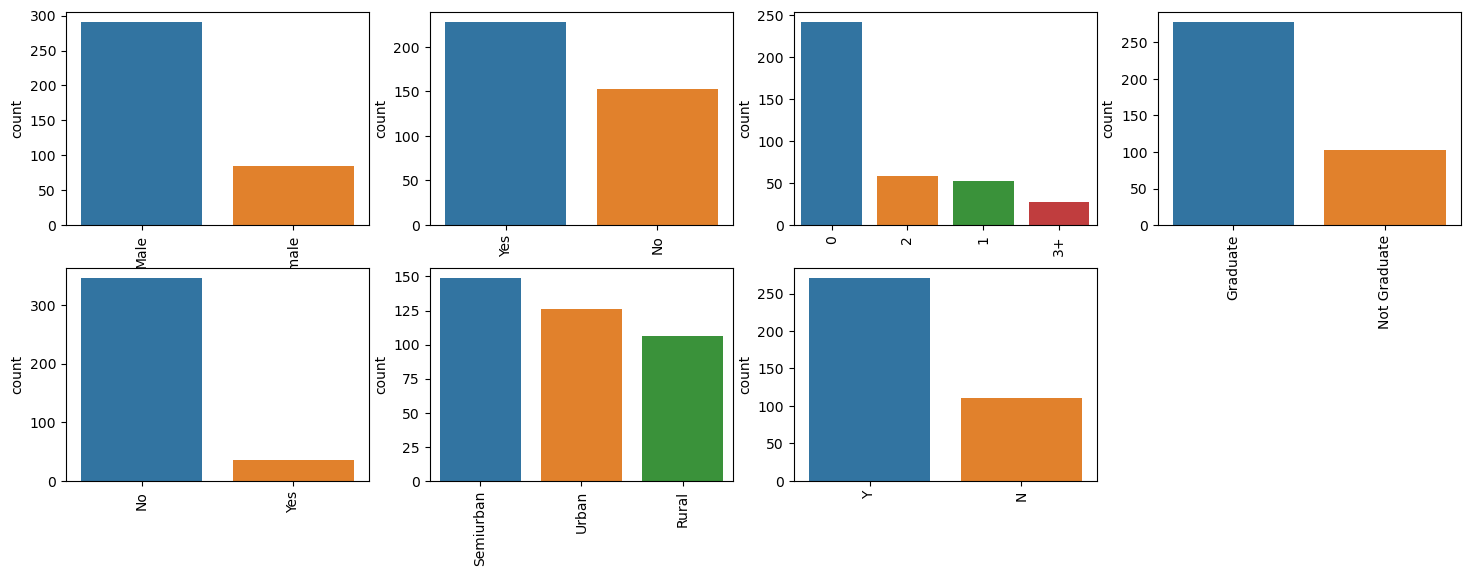

In [79]:
obj = (df.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1

for col in object_cols: 
    y = df[col].value_counts() 
    plt.subplot(11,4,index) 
    plt.xticks(rotation=90) 
    sns.barplot(x=list(y.index), y=y) 
    index +=1

In [80]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how 
# to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
obj = (df.dtypes == 'object') 
for col in list(obj[obj].index): 
     df[col] = label_encoder.fit_transform(df[col])


In [81]:
# To find the number of columns with 
# datatype==object 
obj = (df.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 0


<Axes: >

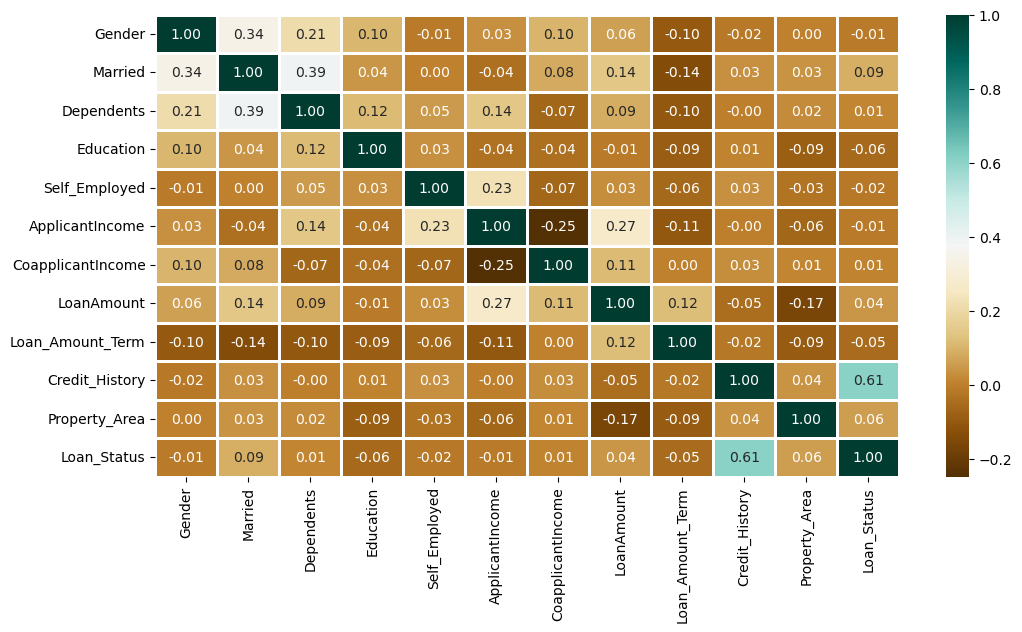

In [82]:
plt.figure(figsize=(12,6)) 

sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)

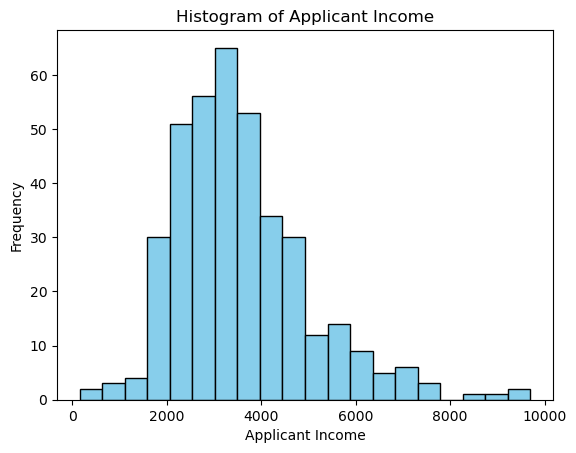

In [83]:
# Look at the distribution of loan amounts with a histogram.
applicant_income = df['ApplicantIncome']

# Create a histogram
plt.hist(applicant_income, bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Histogram of Applicant Income')

# Show the plot
plt.show()


# create a box plot:-

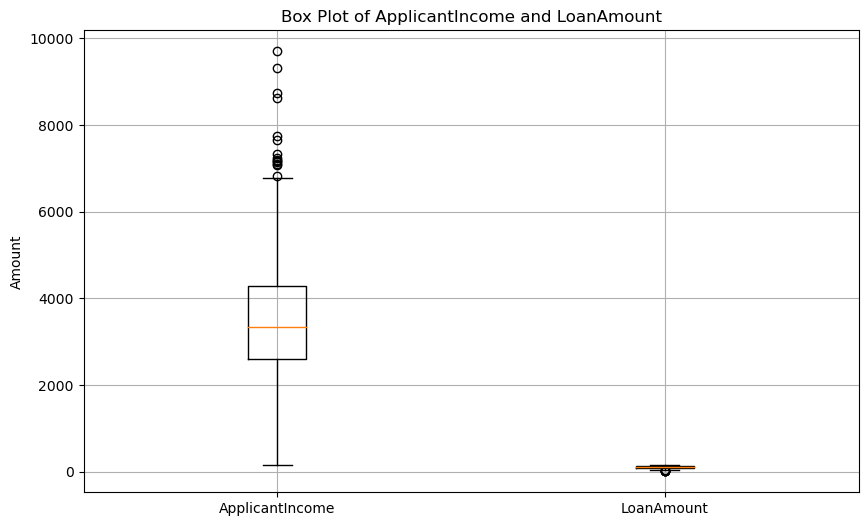

In [84]:
plt.figure(figsize=(10, 6))
plt.boxplot([df['ApplicantIncome'], df['LoanAmount']], labels=['ApplicantIncome', 'LoanAmount'])
plt.title('Box Plot of ApplicantIncome and LoanAmount')
plt.ylabel('Amount')
plt.grid(True)
plt.show()


# Scatter plot

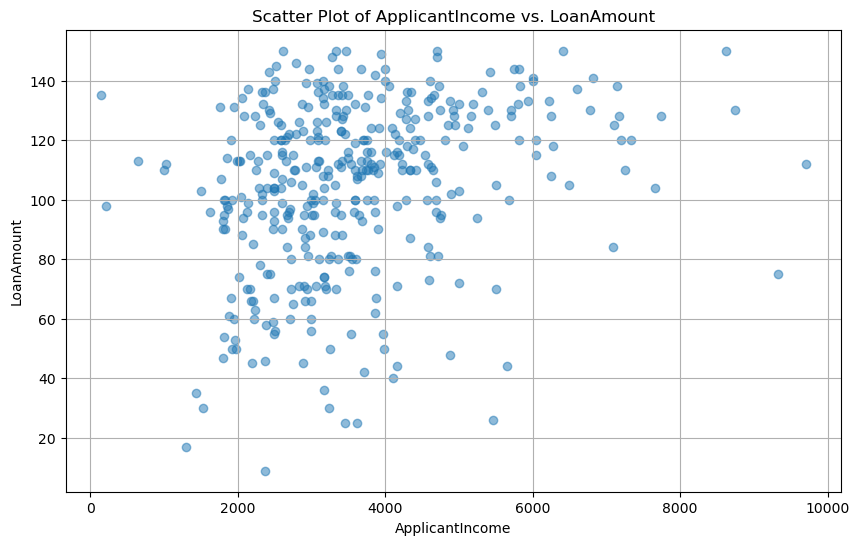

In [85]:
plt.figure(figsize=(10, 6))
plt.scatter(df['ApplicantIncome'], df['LoanAmount'], alpha=0.5)
plt.title('Scatter Plot of ApplicantIncome vs. LoanAmount')
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.grid(True)
plt.show()

# Logistic Regression:-

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [87]:
# Define features (X) and target variable (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']


In [88]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)


In [89]:
# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [90]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [91]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.82


In [92]:
# Display classification report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      0.33      0.50        21
           1       0.80      1.00      0.89        56

    accuracy                           0.82        77
   macro avg       0.90      0.67      0.69        77
weighted avg       0.85      0.82      0.78        77



In [93]:
# Make predictions on the test set
predictions_train = model.predict(X_train)

In [42]:
accuracy1 = accuracy_score(y_train, predictions_train)
print(f'Accuracy: {accuracy1:.2f}')


Accuracy: 0.85
